# DATA COLLECTION

In [1]:
# UNIVARIENT LINEAR REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [2]:
data=pd.read_csv('FuelConsumption.csv')
data.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
data.shape

(1067, 13)

# DATA ANALYSIS

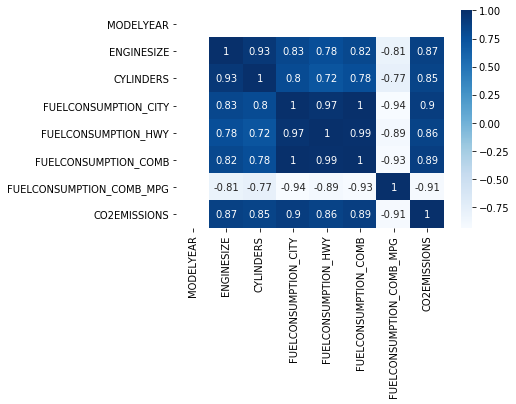

In [4]:
sb.heatmap(data.corr(),cmap='Blues',annot=True)

In [5]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# DATA WRANGLING

In [6]:
data.isnull()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,False,False,False,False,False,False,False,False,False,False,False,False,False
1063,False,False,False,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

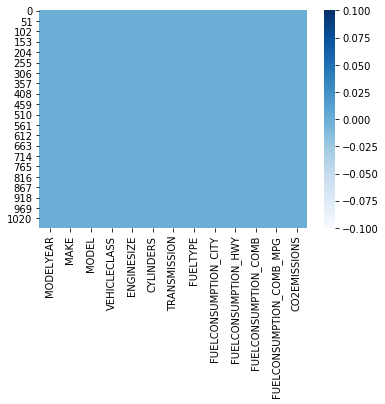

In [8]:
sb.heatmap(data.isnull(),cmap='Blues')

# TRAIN AND TEST DATA

In [9]:
#Using MODERN METHOD
x=np.asanyarray(data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']])
y=np.asanyarray(data[['CO2EMISSIONS']])


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [11]:
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
print(lr.intercept_,lr.coef_,sep=' ')

[5.68434189e-14] [[ 3.41371233e-14 -1.01828843e-14  1.20594956e-15  1.00000000e+00]]


In [12]:
predict=lr.predict(x_test)


# EVALUATION

In [13]:
mean_absolute_error(y_test,predict)


1.593740715723589e-14

In [14]:
mean_squared_error(y_test,predict)

7.096504232986328e-28

In [15]:
r2_score(y_test,predict)

1.0

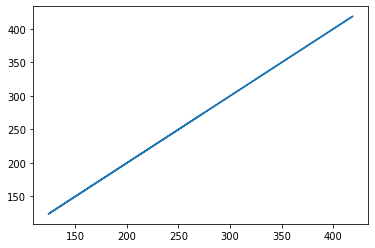

In [16]:
plt.plot(y_test,predict)

In [17]:
print(x_test,y_test)

[[  3.    6.   11.9 274. ]
 [  1.4   4.    8.7 200. ]
 [  2.    4.    8.5 196. ]
 [  2.    4.    7.  161. ]
 [  4.6   8.   13.9 320. ]
 [  3.    6.    8.3 224. ]
 [  2.    4.    7.1 192. ]
 [  1.8   4.    8.2 189. ]
 [  3.    6.    9.6 221. ]
 [  2.4   4.    7.9 182. ]
 [  2.4   4.   10.  230. ]
 [  3.    6.   12.3 283. ]
 [  2.4   4.    8.2 189. ]
 [  5.2  10.   17.4 400. ]
 [  2.5   4.    8.1 186. ]
 [  2.5   4.    7.3 168. ]
 [  1.6   4.    8.5 196. ]
 [  4.4   8.   14.7 338. ]
 [  3.5   6.   11.8 271. ]
 [  2.4   4.    9.8 225. ]
 [  6.    8.   25.8 413. ]
 [  2.5   4.    9.7 223. ]
 [  3.7   6.   10.8 248. ]
 [  3.5   6.   11.5 264. ]
 [  3.7   6.   13.4 308. ]
 [  3.    6.   10.1 232. ]
 [  1.2   3.    6.4 147. ]
 [  5.5   8.   10.7 246. ]
 [  1.6   4.    7.8 179. ]
 [  2.    4.   11.9 274. ]
 [  3.    6.    9.1 246. ]
 [  5.2  10.   17.8 409. ]
 [  3.5   6.   10.2 235. ]
 [  5.3   8.   18.4 294. ]
 [  4.    8.   12.2 281. ]
 [  5.3   8.   13.8 317. ]
 [  6.2   8.   16.4 377. ]
 